In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_excel('crime2.xlsx')

In [3]:
data.head(10)

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182080058,2403,Disorderly Conduct,DISTURBING THE PEACE,E18,495,NaN,2018-10-03 20:13:00,2018,10,Wednesday,20,Part Two,ARLINGTON ST,42.262608,-71.121186,"(42.26260773, -71.12118637)"
1,I182080053,3201,Property Lost,PROPERTY - LOST,D14,795,NaN,2018-08-30 20:00:00,2018,8,Thursday,20,Part Three,ALLSTON ST,42.352111,-71.135311,"(42.35211146, -71.13531147)"
2,I182080052,2647,Other,THREATS TO DO BODILY HARM,B2,329,NaN,2018-10-03 19:20:00,2018,10,Wednesday,19,Part Two,DEVON ST,42.308126,-71.076930,"(42.30812619, -71.07692974)"
3,I182080051,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,A1,92,NaN,2018-10-03 20:00:00,2018,10,Wednesday,20,Part One,CAMBRIDGE ST,42.359454,-71.059648,"(42.35945371, -71.05964817)"
4,I182080050,3122,Aircraft,AIRCRAFT INCIDENTS,A7,36,NaN,2018-10-03 20:49:00,2018,10,Wednesday,20,Part Three,PRESCOTT ST,42.375258,-71.024663,"(42.37525782, -71.02466343)"
5,I182080049,1402,Vandalism,VANDALISM,C11,351,NaN,2018-10-02 20:40:00,2018,10,Tuesday,20,Part Two,DORCHESTER AVE,42.299197,-71.060470,"(42.29919694, -71.06046974)"
6,I182080048,3803,Motor Vehicle Accident Response,M/V ACCIDENT - PERSONAL INJURY,NaN,,NaN,2018-10-03 20:16:00,2018,10,Wednesday,20,Part Three,NaN,42.320734,-71.056764,"(42.32073413, -71.05676415)"
7,I182080047,3301,Verbal Disputes,VERBAL DISPUTE,B2,603,NaN,2018-10-03 19:32:00,2018,10,Wednesday,19,Part Three,TREMONT ST,42.333807,-71.103778,"(42.33380683, -71.10377843)"
8,I182080045,802,Simple Assault,ASSAULT SIMPLE - BATTERY,E18,543,NaN,2018-10-03 19:27:51,2018,10,Wednesday,19,Part Two,AVILA RD,42.256145,-71.128025,"(42.25614494, -71.12802506)"
9,I182080044,3410,Towed,TOWED MOTOR VEHICLE,D4,621,NaN,2018-10-03 20:00:00,2018,10,Wednesday,20,Part Three,COMMONWEALTH AVE,42.348866,-71.089363,"(42.34886600, -71.08936284)"


In [4]:
data.shape

(327820, 17)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 327820 entries, 0 to 327819
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   INCIDENT_NUMBER      327820 non-null  object        
 1   OFFENSE_CODE         327820 non-null  int64         
 2   OFFENSE_CODE_GROUP   327820 non-null  object        
 3   OFFENSE_DESCRIPTION  327820 non-null  object        
 4   DISTRICT             326046 non-null  object        
 5   REPORTING_AREA       327820 non-null  object        
 6   SHOOTING             1055 non-null    object        
 7   OCCURRED_ON_DATE     327820 non-null  datetime64[ns]
 8   YEAR                 327820 non-null  int64         
 9   MONTH                327820 non-null  int64         
 10  DAY_OF_WEEK          327820 non-null  object        
 11  HOUR                 327820 non-null  int64         
 12  UCR_PART             327727 non-null  object        
 13  STREET        

#### DROP THE INCIDENT_NUMBER AND OFFENSE_CODE COLUMNS

In [6]:
data = data.drop(['INCIDENT_NUMBER', 'OFFENSE_CODE'], axis = 1)

In [7]:
data.head()

,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,Disorderly Conduct,DISTURBING THE PEACE,E18,495,NaN,2018-10-03 20:13:00,2018,10,Wednesday,20,Part Two,ARLINGTON ST,42.262608,-71.121186,"(42.26260773, -71.12118637)"
1,Property Lost,PROPERTY - LOST,D14,795,NaN,2018-08-30 20:00:00,2018,8,Thursday,20,Part Three,ALLSTON ST,42.352111,-71.135311,"(42.35211146, -71.13531147)"
2,Other,THREATS TO DO BODILY HARM,B2,329,NaN,2018-10-03 19:20:00,2018,10,Wednesday,19,Part Two,DEVON ST,42.308126,-71.076930,"(42.30812619, -71.07692974)"
3,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,A1,92,NaN,2018-10-03 20:00:00,2018,10,Wednesday,20,Part One,CAMBRIDGE ST,42.359454,-71.059648,"(42.35945371, -71.05964817)"
4,Aircraft,AIRCRAFT INCIDENTS,A7,36,NaN,2018-10-03 20:49:00,2018,10,Wednesday,20,Part Three,PRESCOTT ST,42.375258,-71.024663,"(42.37525782, -71.02466343)"


#### CONVERT THE OFFENSE_CODE_GROUP COLUMN TO AN ORDERED CATEGORY AND NUMERIC FORMAT

In [8]:
data['OFFENSE_CODE_GROUP'].value_counts()

Motor Vehicle Accident Response              38134
Larceny                                      26670
Medical Assistance                           24226
Investigate Person                           19176
Other                                        18612
                                             ...  
HUMAN TRAFFICKING                                7
INVESTIGATE PERSON                               4
Biological Threat                                2
HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE        2
Burglary - No Property Taken                     2
Name: OFFENSE_CODE_GROUP, Length: 67, dtype: int64

In [9]:
data['OFFENSE_CODE_GROUP'].nunique()

67

In [10]:
target_names = data['OFFENSE_CODE_GROUP'].unique()

In [11]:
data['OFFENSE_CODE_GROUP'] = pd.Categorical(data['OFFENSE_CODE_GROUP'], categories = target_names, ordered = True)

In [12]:
target_names

array(['Disorderly Conduct', 'Property Lost', 'Other',
       'Aggravated Assault', 'Aircraft', 'Vandalism',
       'Motor Vehicle Accident Response', 'Verbal Disputes',
       'Simple Assault', 'Towed', 'Auto Theft', 'Medical Assistance',
       'Investigate Person', 'Fire Related Reports', 'Larceny',
       'Investigate Property', 'Harassment', 'Robbery', 'Drug Violation',
       'Violations', 'Liquor Violation', 'Fraud', 'Warrant Arrests',
       'Recovered Stolen Property', 'Residential Burglary',
       'Restraining Order Violations', 'Property Found',
       'Missing Person Reported', 'Confidence Games', 'Ballistics',
       'Larceny From Motor Vehicle', 'HOME INVASION',
       'Landlord/Tenant Disputes', 'Firearm Violations',
       'Missing Person Located', 'Prisoner Related Incidents',
       'Auto Theft Recovery', 'License Plate Related Incidents',
       'Embezzlement', 'Property Related Damage', 'Other Burglary',
       'Operating Under the Influence', 'Commercial Burglary'

In [13]:
target_index = list(range(67))

In [14]:
target_data = list(target_names)

In [15]:
target_dict = dict(zip(target_data, target_index))

In [16]:
data['Offense_Group'] = [target_dict[item] for item in data['OFFENSE_CODE_GROUP']]

In [17]:
data = data.drop('OFFENSE_CODE_GROUP', axis = 1)

#### DROP THE ROWS WITH NULL VALUES IN DISTRICT COLUMN

In [18]:
data = data[data['DISTRICT'].notna()]

#### REPLACE THE MISSING VALUES IN SHOOTING COLUMN WITH 'N'

In [19]:
data['SHOOTING'] = data['SHOOTING'].fillna(value = 'N')

In [20]:
data['SHOOTING'].value_counts()

N    324993
Y      1053
Name: SHOOTING, dtype: int64

#### CONVERT THE VALUES TO NUMERIC

In [21]:
shoot = {'N': 0, 'Y': 1}

In [22]:
data['SHOOTING'] = [shoot[item] for item in data['SHOOTING']]

#### CONVERT THE DAY OF WEEK COLUMN TO NUMERIC

In [23]:
data.DAY_OF_WEEK.unique()

array(['Wednesday', 'Thursday', 'Tuesday', 'Monday', 'Saturday', 'Sunday',
       'Friday'], dtype=object)

In [24]:
day = {'Sunday': 0, 'Monday': 1, 'Tuesday' : 2,'Wednesday' : 3, 'Thursday' : 4, 'Friday' : 5, 'Saturday' : 6}

In [25]:
data['DAY_OF_WEEK'] = [day[item] for item in data['DAY_OF_WEEK']]

In [26]:
data['DAY_OF_WEEK'].value_counts()

5    49462
3    47917
4    47596
2    47452
1    46720
6    45737
0    41162
Name: DAY_OF_WEEK, dtype: int64

#### PREPROCESS THE UCR_PART COLUMN

In [27]:
data['UCR_PART'].unique()

array(['Part Two', 'Part Three', 'Part One', nan, 'Other'], dtype=object)

In [28]:
data['UCR_PART'].isnull().value_counts()

False    325953
True         93
Name: UCR_PART, dtype: int64

In [29]:
data['UCR_PART'].value_counts()

Part Three    161903
Part Two       99765
Part One       63011
Other           1274
Name: UCR_PART, dtype: int64

In [31]:
# data.groupby('UCR_PART')['OFFENSE_CODE_GROUP'].count()

In [32]:
data['UCR_PART'] = data['UCR_PART'].fillna(value = 'Part Three')

In [33]:
data['UCR_PART'].unique()

array(['Part Two', 'Part Three', 'Part One', 'Other'], dtype=object)

In [34]:
ucr = {'Other' : 0, 'Part One': 1, 'Part Two': 2, 'Part Three': 3}

In [35]:
ucr

{'Other': 0, 'Part One': 1, 'Part Two': 2, 'Part Three': 3}

In [36]:
data['UCR_PART'] = [ucr[item] for item in data['UCR_PART']]

#### CREATE NEW LATITUDE COLUMN FROM LOCATION COLUMN

In [37]:
data['Location']

0         (42.26260773, -71.12118637)
1         (42.35211146, -71.13531147)
2         (42.30812619, -71.07692974)
3         (42.35945371, -71.05964817)
4         (42.37525782, -71.02466343)
                     ...             
327815    (42.33695098, -71.08574813)
327816    (42.25592648, -71.12317207)
327817    (42.25592648, -71.12317207)
327818    (42.30233307, -71.11156487)
327819    (42.33383935, -71.08029038)
Name: Location, Length: 326046, dtype: object

In [38]:
loc = lambda x: x.split(',')[0] 

In [39]:
data['Latitude'] = data['Location'].apply(loc)

In [40]:
data = data.drop('Lat', axis = 1)

In [41]:
lat = data.Latitude.str.replace('(', '')
data.insert(14, 'Lat', lat)

In [42]:
data = data.drop('Latitude', axis = 1)

In [43]:
data['Lat'] = data['Lat'].astype('float')

#### CREATE NEW LONGITUDE COLUMN FROM LOCATION COLUMN

In [44]:
loc = lambda x: x.split(',')[1] 

In [45]:
data['Longitude'] = data['Location'].apply(loc)

In [46]:
data = data.drop('Long', axis = 1)

In [47]:
long = data.Longitude.str.replace(')', '')
data.insert(14, 'Long', long)

In [48]:
data = data.drop('Longitude', axis = 1)

In [49]:
data['Long'] = data['Long'].astype('float')

#### DROP THE LOCATION COLUMN

In [50]:
data = data.drop('Location', axis = 1)

#### PREPROCESS THE STREET COLUMN

In [51]:
data = data[data['STREET'].notna()]

In [52]:
data['STREET'].nunique()

4358

In [53]:
street = list(data['STREET'].unique())

In [54]:
street_ind = list(range(4358))

In [55]:
street_data = dict(zip(street, street_ind))

In [56]:
data['Street'] = [street_data[item] for item in data['STREET']]

In [57]:
data = data.drop('STREET', axis = 1)

#### CONVERTING THE REPORTING AREA COLUMN TO NUMERIC

In [58]:
data['REPORTING_AREA'].nunique()

880

In [59]:
data['REPORTING_AREA'].unique()

array([495, 795, 329, 92, 36, 351, 603, 543, 621, 750, 582, 484, 427, 469,
       385, 326, 626, 338, 234, 146, 295, 294, 256, 640, 165, 779, 80, 15,
       948, 255, 405, 279, 588, 342, 520, 448, 134, 183, 387, 214, 174,
       268, 922, 270, 67, 157, 915, 944, 96, 328, 28, 280, 624, 359, 817,
       773, 94, 129, 485, 613, 610, 587, 230, 111, 78, 41, 114, 110, 822,
       316, 310, 16, 345, 12, 68, 45, 904, 113, 602, 103, 296, 914, 25,
       193, 131, 179, 691, 228, 361, 58, 398, 916, 418, 792, 307, 119,
       454, 162, 77, 102, 182, 565, 312, 341, 86, 206, 501, 237, 61, 344,
       368, ' ', 325, 521, 395, 608, 793, 29, 167, 783, 235, 381, 305,
       282, 435, 117, 606, 463, 451, 958, 289, 936, 172, 130, 239, 318,
       516, 340, 319, 186, 620, 143, 450, 20, 152, 281, 324, 336, 794,
       482, 348, 170, 455, 938, 711, 22, 542, 775, 288, 568, 175, 320,
       350, 472, 425, 311, 402, 618, 173, 313, 357, 168, 400, 260, 378,
       493, 903, 221, 796, 627, 716, 177, 347, 426, 539,

In [60]:
data['REPORTING_AREA'].value_counts()

       10213
111     2431
186     2069
329     1933
117     1888
       ...  
669       12
745        7
190        5
218        1
950        1
Name: REPORTING_AREA, Length: 880, dtype: int64

In [61]:
data['REPORTING_AREA'] = data['REPORTING_AREA'].replace(' ', '0')

In [62]:
data['REPORTING_AREA'] = data['REPORTING_AREA'].astype('int')

In [63]:
data['REPORTING_AREA'].value_counts()

0      10227
111     2431
186     2069
329     1933
117     1888
       ...  
669       12
745        7
190        5
218        1
950        1
Name: REPORTING_AREA, Length: 879, dtype: int64

#### PREPROCESSING THE DISTRICT COLUMN

In [64]:
data['DISTRICT'].nunique()

12

In [65]:
dist = list(data['DISTRICT'].unique())

In [66]:
dist.sort()

In [67]:
dist_values = list(range(12))

In [68]:
dist_data = dict(zip(dist, dist_values))

In [69]:
data['District'] = [dist_data[item] for item in data['DISTRICT']]

In [70]:
data = data.drop('DISTRICT', axis = 1)

#### OFFENSE DESCRIPTION COLUMN

In [71]:
data['OFFENSE_DESCRIPTION'].nunique()

243

In [74]:
descr = list(data['OFFENSE_DESCRIPTION'].unique())

In [76]:
descr_index = list(range(len(descr)))

In [78]:
descr_dict = dict(zip(descr, descr_index))

In [81]:
data['Offense_Description'] = [descr_dict[item] for item in data['OFFENSE_DESCRIPTION']]

In [84]:
data = data.drop('OFFENSE_DESCRIPTION', axis = 1)

#### CREATE A DAY COLUMN FROM THE OCCURRED_ON_DATE COLUMN

In [ ]:
y = lambda x: x.day

In [ ]:
data['Day'] = data['OCCURRED_ON_DATE'].map(y)

#### DROP THE OCCURRED_ON_DAY COLUMN

In [93]:
data = data.drop('OCCURRED_ON_DATE', axis = 1)

#### A PAIRPLOT THAT SHOWS THE RELATIONSHIPS BETWEEN THE FEATURES

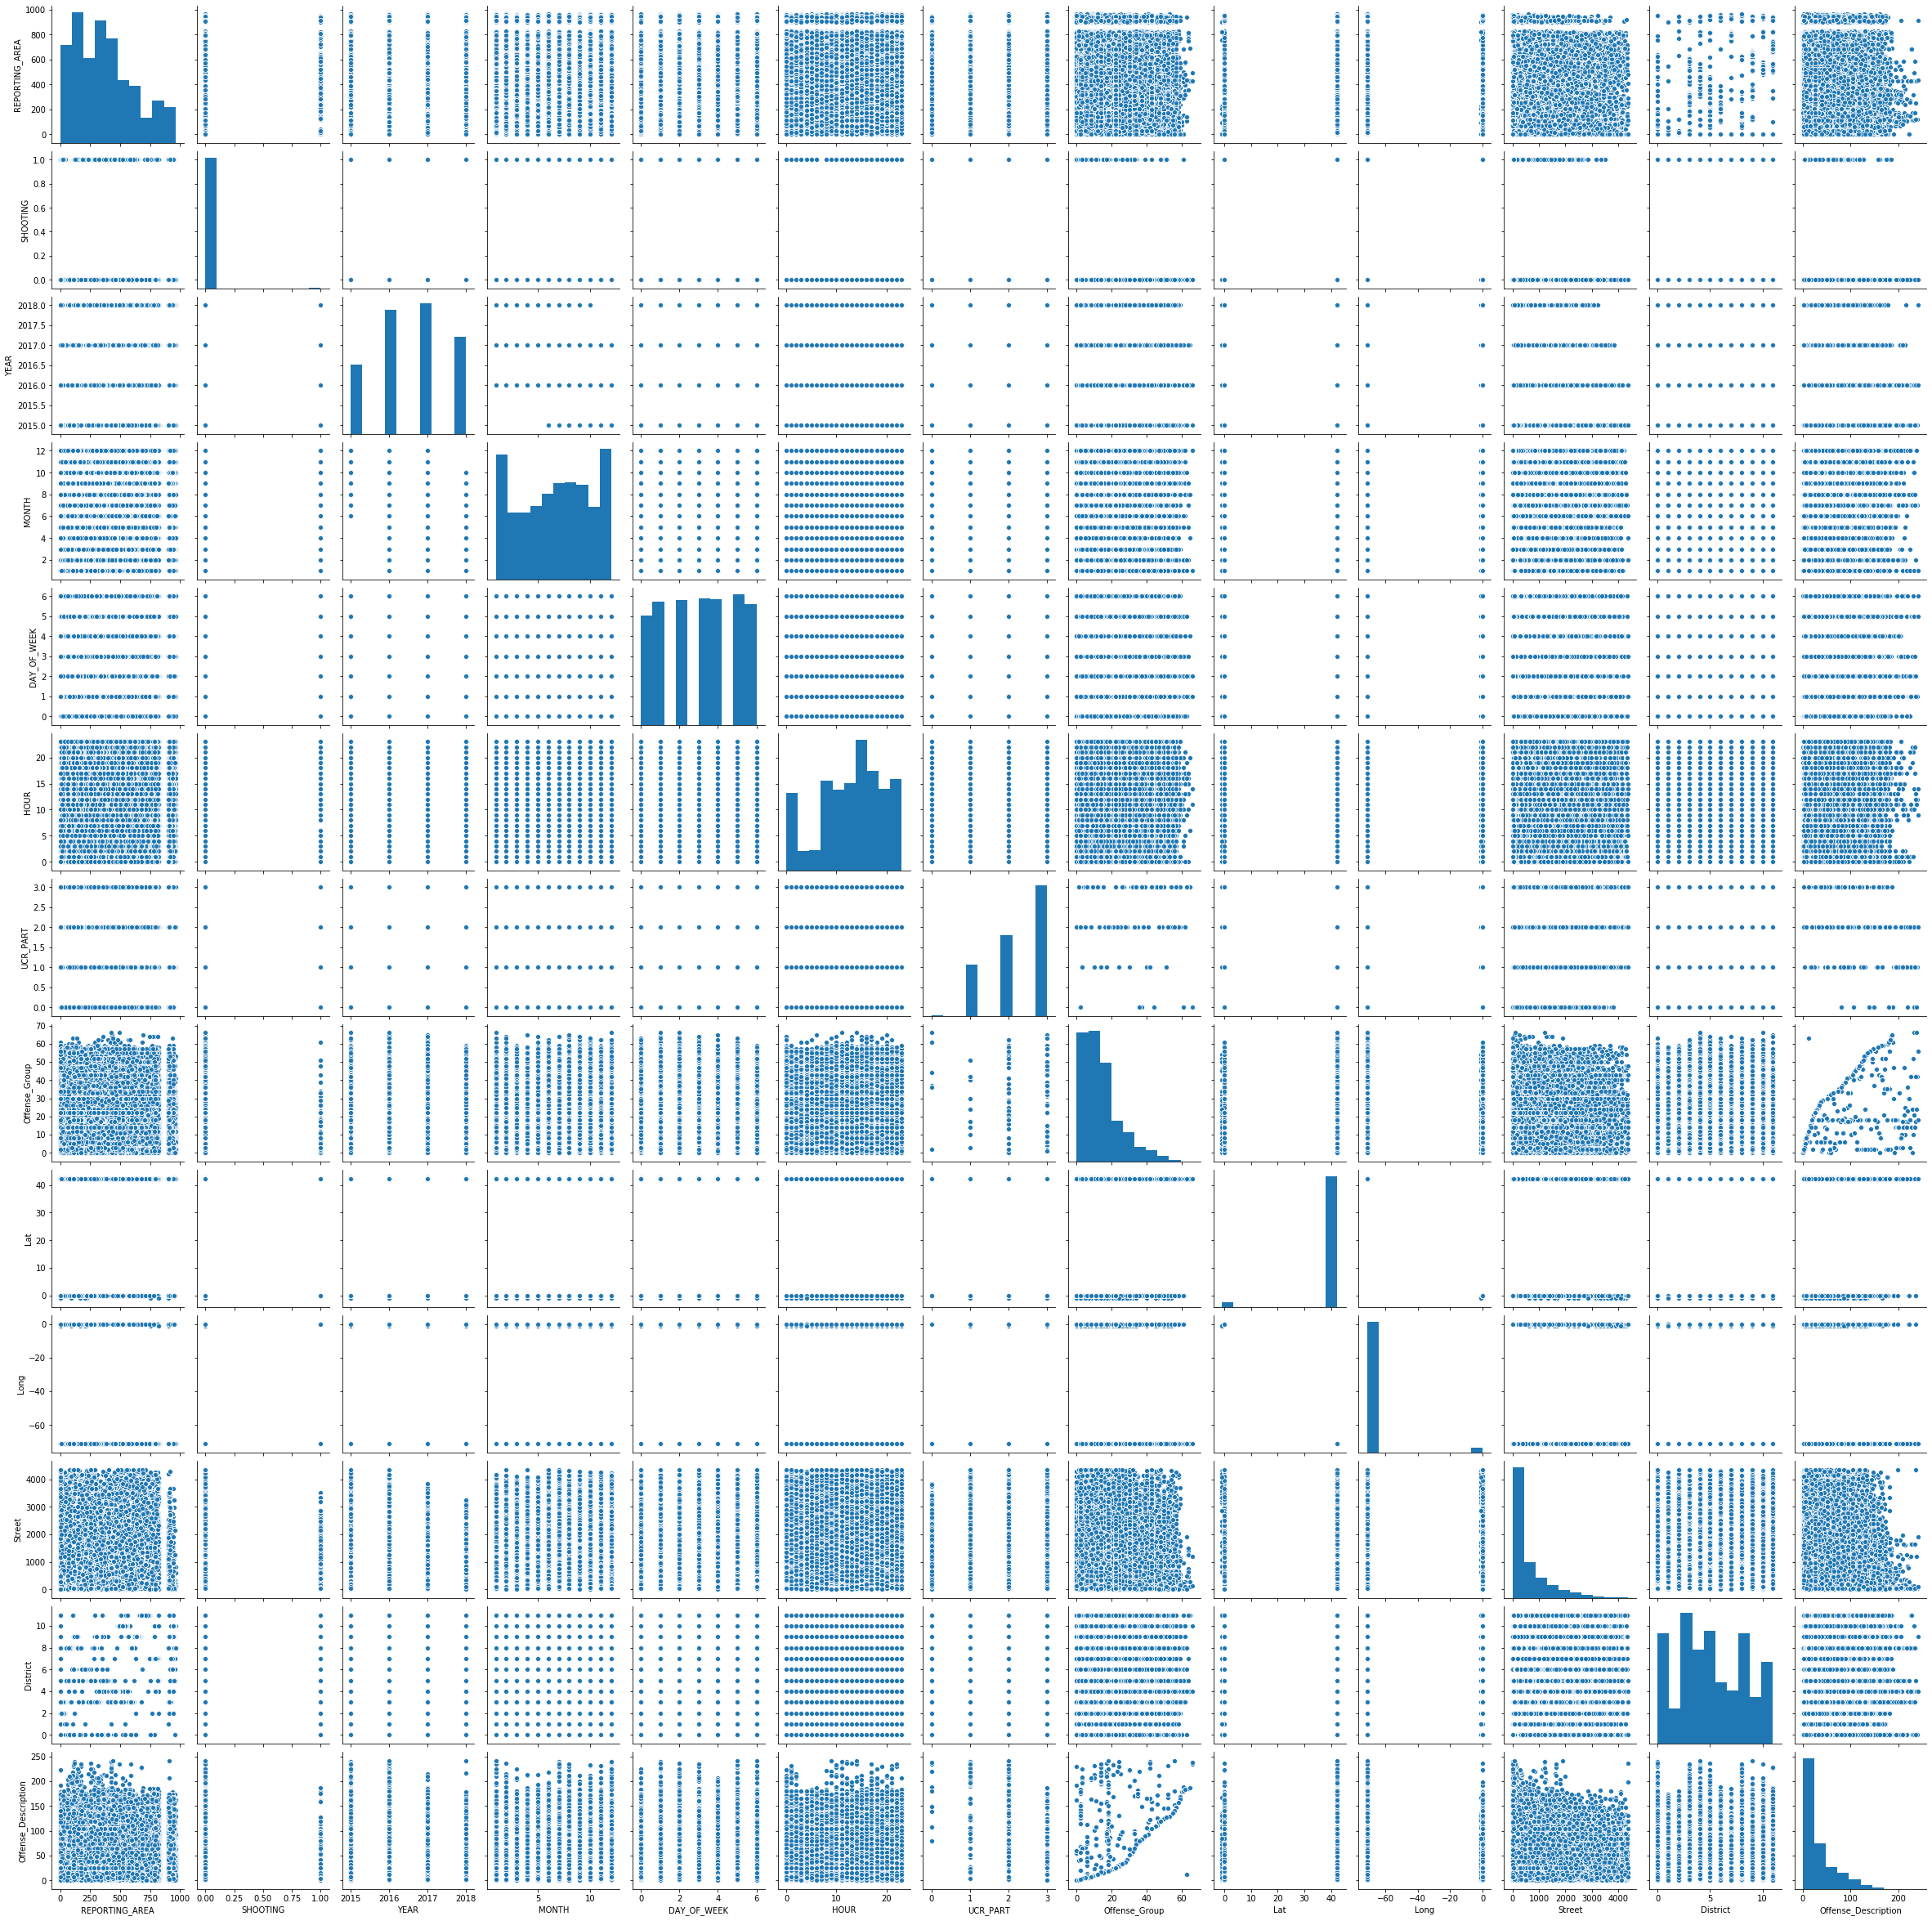

In [87]:
sns.pairplot(data)

In [94]:
data.head(10)

,REPORTING_AREA,SHOOTING,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,Offense_Group,Lat,Long,Street,District,Offense_Description,Day
0,495,0,2018,10,3,20,2,0,42.262608,-71.121186,0,10,0,3
1,795,0,2018,8,4,20,3,1,42.352111,-71.135311,1,7,1,30
2,329,0,2018,10,3,19,2,2,42.308126,-71.076930,2,3,2,3
3,92,0,2018,10,3,20,1,3,42.359454,-71.059648,3,0,3,3
4,36,0,2018,10,3,20,3,4,42.375258,-71.024663,4,2,4,3
5,351,0,2018,10,2,20,2,5,42.299197,-71.060470,5,5,5,2
7,603,0,2018,10,3,19,3,7,42.333807,-71.103778,6,3,6,3
8,543,0,2018,10,3,19,2,8,42.256145,-71.128025,7,10,7,3
9,621,0,2018,10,3,20,3,9,42.348866,-71.089363,8,8,8,3
10,750,0,2018,10,3,19,3,6,42.344323,-71.157784,9,7,9,3


In [95]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 316096 entries, 0 to 327819
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   REPORTING_AREA       316096 non-null  int32  
 1   SHOOTING             316096 non-null  int64  
 2   YEAR                 316096 non-null  int64  
 3   MONTH                316096 non-null  int64  
 4   DAY_OF_WEEK          316096 non-null  int64  
 5   HOUR                 316096 non-null  int64  
 6   UCR_PART             316096 non-null  int64  
 7   Offense_Group        316096 non-null  int64  
 8   Lat                  316096 non-null  float64
 9   Long                 316096 non-null  float64
 10  Street               316096 non-null  int64  
 11  District             316096 non-null  int64  
 12  Offense_Description  316096 non-null  int64  
 13  Day                  316096 non-null  int64  
dtypes: float64(2), int32(1), int64(11)
memory usage: 45.0 MB
